In [39]:
import matplotlib.pyplot as plt
import numpy as np
import lightgbm as lgb
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [7]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [11]:
def show_feature_importance(feature_importances: np.array, feature_names: list, title: str=None):
    pd.Series(
        feature_importances,
        feature_names,
        name='value'
    ).sort_values(ascending=True).plot.barh(title=title)
    
    plt.show()

In [9]:
lgb_model = lgb.LGBMClassifier(n_estimators=50)
lgb_model.fit(X, y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=50, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [10]:
lgb_model.feature_importances_

array([ 92, 123, 301, 176])

1. 調査する feature を絞り込む

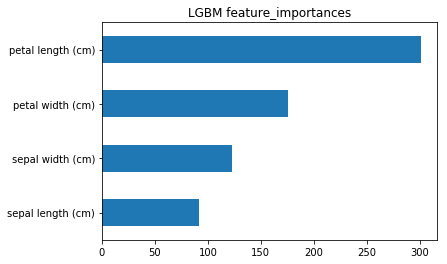

In [12]:
show_feature_importance(lgb_model.feature_importances_, iris.feature_names, 'LGBM feature_importances')

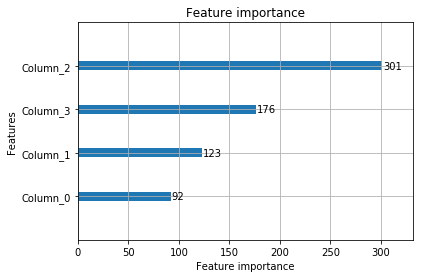

In [38]:
lgb.plot_importance(lgb_model)

In [13]:
rf_model = RandomForestClassifier(n_estimators=50)
rf_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

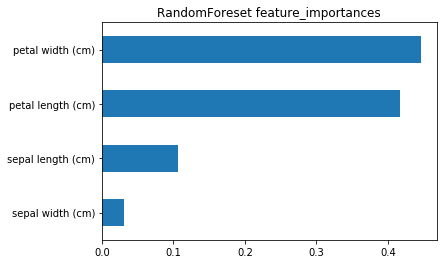

In [14]:
show_feature_importance(
    rf_model.feature_importances_,
    iris.feature_names,
    title='RandomForeset feature_importances'
)

In [47]:
lr_model = LogisticRegression(multi_class='ovr', solver='lbfgs')
lr_model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

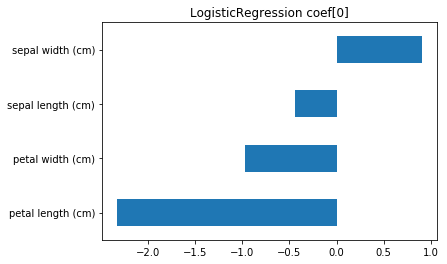

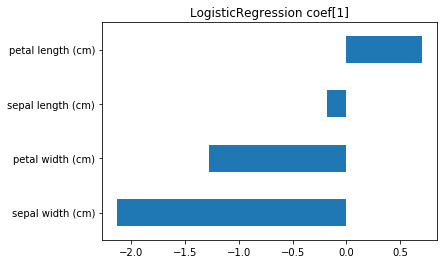

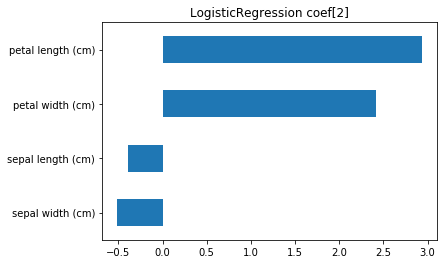

In [52]:
show_feature_importance(
    lr_model.coef_[0],
    iris.feature_names,
    title='LogisticRegression coef[0]'
)
show_feature_importance(
    lr_model.coef_[1],
    iris.feature_names,
    title='LogisticRegression coef[1]'
)
show_feature_importance(
    lr_model.coef_[2],
    iris.feature_names,
    title='LogisticRegression coef[2]'
)

2. feature から、相関・共起を調査する。

In [29]:
df = pd.DataFrame(X, columns=iris.feature_names)
df = pd.concat([df, pd.Series(y)], axis=1).rename(columns={0: 'target'})

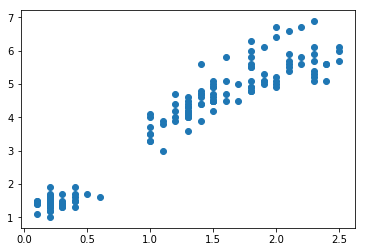

In [33]:
plt.scatter(x=df['petal width (cm)'], y=df['petal length (cm)'])

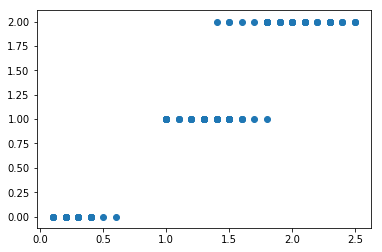

In [37]:
plt.scatter(x=df['petal width (cm)'], y=df['target'])

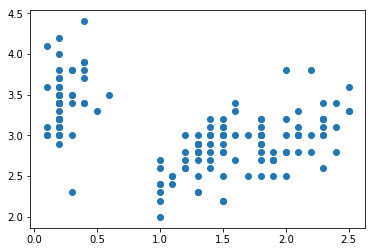

In [35]:
plt.scatter(x=df['petal width (cm)'], y=df['sepal width (cm)'])

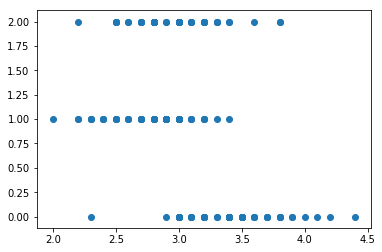

In [36]:
plt.scatter(x=df['sepal width (cm)'], y=df['target'])